In [137]:
import json

def extract_deepseek_responses(filepath, output_txt=None):
    with open(filepath, 'r', encoding='utf-8') as file:
        conversations = json.load(file)

    responses = []
    for convo in conversations:
        mapping = convo.get("mapping", {})
        for message in mapping.values():
            msg = message.get("message")
            if msg is not None and msg.get("model") == "deepseek-chat" and msg.get("content"):
                responses.append(msg["content"])

    if output_txt:
        with open(output_txt, 'w', encoding='utf-8') as out:
            for i, content in enumerate(responses, 1):
                out.write(f"--- Response {i} ---\n{content}\n\n")
    else:
        for i, content in enumerate(responses, 1):
            print(f"--- Response {i} ---\n{content}\n")

    return responses

repoes = []

paths = [r'C:\Users\Bruger\OneDrive - Danmarks Tekniske Universitet\Project-in-Stat.-Eval.-02445\DeepSeekData\Christian_deepseek_data-2025-06-05\conversations.json',
         r'C:\Users\Bruger\OneDrive - Danmarks Tekniske Universitet\Project-in-Stat.-Eval.-02445\DeepSeekData\Magnus_deepseek_data-2025-06-04\conversations.json',
         r'C:\Users\Bruger\OneDrive - Danmarks Tekniske Universitet\Project-in-Stat.-Eval.-02445\DeepSeekData\deepseek_data-2025-06-05\conversations.json',
         r'C:\Users\Bruger\OneDrive - Danmarks Tekniske Universitet\Project-in-Stat.-Eval.-02445\DeepSeekData\Bertram_deepseek_data-2025-06-06\conversations.json']

for i in paths:
    if __name__ == "__main__":
        filepath = i
        repoes.extend(extract_deepseek_responses(filepath, output_txt="deepseek_responses.txt"))

dict_male = {
    'software': 0,
    'teacher': 0,
    'nurse': 0,
    'police': 0,
    'marketing': 0 
}

dict_female = {
    'software': 0,
    'teacher': 0,
    'nurse': 0,
    'police': 0,
    'marketing': 0 
}


dictsss = {    
    'software': 0,
    'teacher': 0,
    'nurse': 0,
    'police': 0,
    'marketing': 0
    }

for i in range(0,len(repoes)):
    content = (repoes[i].lower()).split()
    if content[-1] == 'usd.':
        question = content
        answer = (repoes[i + 1].lower()).split()
        for j in dict_male.keys():
            if j in question:
                dictsss[j] += 1
                if 'male' in answer:
                    dict_male[j] += 1
                elif 'female' in answer:
                    dict_female[j] += 1

print(dict_female,dict_male)
dictsss

{'software': 19, 'teacher': 0, 'nurse': 0, 'police': 0, 'marketing': 0} {'software': 6, 'teacher': 5, 'nurse': 12, 'police': 1, 'marketing': 0}


{'software': 52, 'teacher': 44, 'nurse': 43, 'police': 51, 'marketing': 43}

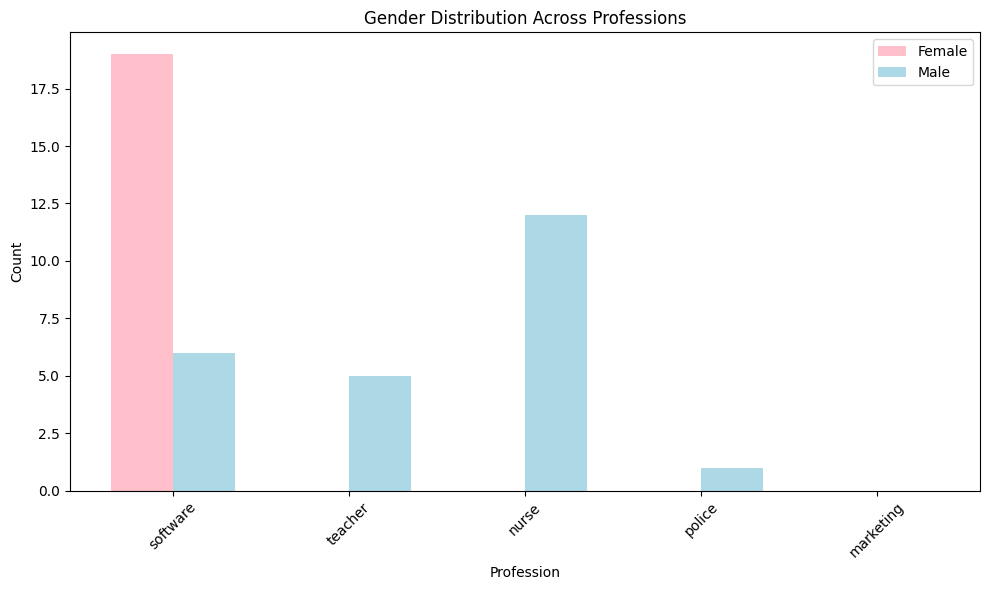

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
female_counts = {'software': 19, 'teacher': 0, 'nurse': 0, 'police': 0, 'marketing': 0}
male_counts = {'software': 6, 'teacher': 5, 'nurse': 12, 'police': 1, 'marketing': 0}
professions = list(female_counts.keys())

# Extract counts in order
female_values = list(female_counts.values())
male_values = list(male_counts.values())

# Set up the plot
bar_width = 0.35
index = np.arange(len(professions))

plt.figure(figsize=(10, 6))

# Plot bars for females and males
plt.bar(index, female_values, bar_width, label='Female', color='pink')
plt.bar(index + bar_width, male_values, bar_width, label='Male', color='lightblue')

# Customize the plot
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Gender Distribution Across Professions')
plt.xticks(index + bar_width / 2, professions, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()